In [1]:
import polars as pl
from record_consolidation.graphs import (
    unconsolidated_df_to_subgraphs,
)
from record_consolidation.subgraph_post_processing.specific_algs.deprecated__split_high_betweenness import (
    draw_graph,
)
import networkx as nx




/Users/mgaster/repos/record-consolidation/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from typing import Iterable
from warnings import warn


def extract_specific_name_subgraph(
    connected_subgs: Iterable[nx.Graph], name: str
) -> nx.Graph:
    collected: list[nx.Graph] = []
    for subg in connected_subgs:
        for n in subg.nodes.data():
            if name.lower() in (n[0]).lower():
                collected.append(subg)
    collected = set(collected)
    if len(collected) == 0:
        raise ValueError(f"Could not find {name=} in connected_subgs.")
    if len(collected) > 1:
        alert_str = f"{len(collected)} subgraphs have {name=}.\n{[len(subg.nodes) for subg in collected]=}"
        warn(alert_str)
        return max(collected, key=lambda g: len(g.nodes))

        # raise ValueError(alert_str)
    return tuple(collected)[0]

In [3]:
# votes: pl.DataFrame = access_db_table("raw_output", "votes")
votes: pl.DataFrame = pl.read_parquet("raw_votes.parquet")
COMPANY_COLS = pl.col(["issuer_name", "cusip", "isin", "figi"])
MEETING_COLS = pl.col(["issuer_name", "meeting_date", "cusip", "isin", "figi"])

In [4]:
G = tuple(
    unconsolidated_df_to_subgraphs(
        votes.select(COMPANY_COLS), connected_subgraphs_postprocessor=None
    )
)

## kmeans

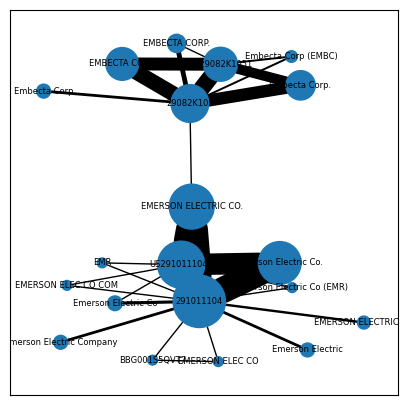

In [5]:
emerson = extract_specific_name_subgraph(G, "emerson electric co.")
draw_graph(emerson, 5)

/Users/mgaster/repos/record-consolidation/.venv/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/mgaster/repos/record-consolidation/.venv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Performing k-means clustering


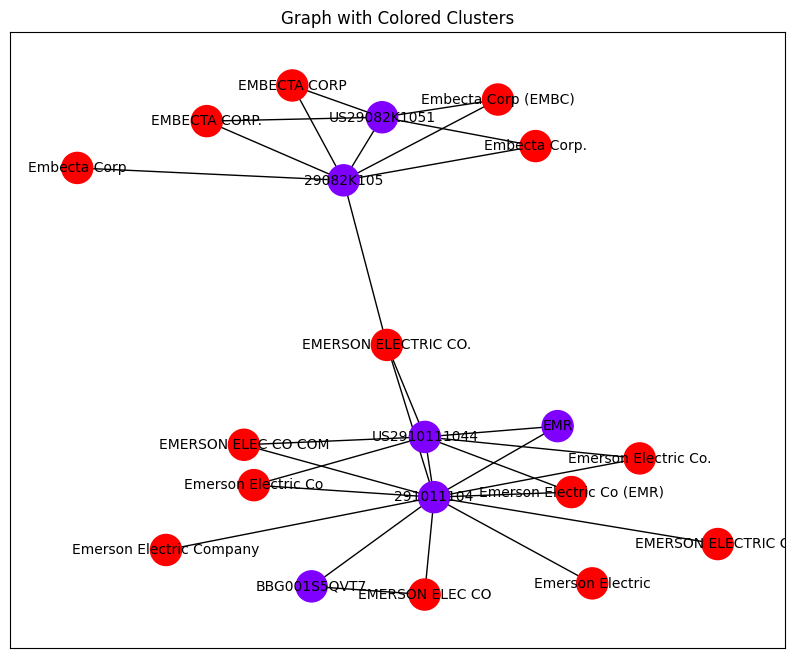

Removed edge between US29082K1051 and EMBECTA CORP (different clusters)
Removed edge between US29082K1051 and Embecta Corp. (different clusters)
Removed edge between US29082K1051 and EMBECTA CORP. (different clusters)
Removed edge between US29082K1051 and Embecta Corp (EMBC) (different clusters)
Removed edge between Embecta Corp (EMBC) and 29082K105 (different clusters)
Removed edge between EMERSON ELECTRIC CO. and 291011104 (different clusters)
Removed edge between EMERSON ELECTRIC CO. and US2910111044 (different clusters)
Removed edge between EMERSON ELECTRIC CO. and 29082K105 (different clusters)
Removed edge between EMERSON ELEC CO COM and 291011104 (different clusters)
Removed edge between EMERSON ELEC CO COM and US2910111044 (different clusters)
Removed edge between EMERSON ELECTRIC CO and 291011104 (different clusters)
Removed edge between EMBECTA CORP. and 29082K105 (different clusters)
Removed edge between Embecta Corp. and 29082K105 (different clusters)
Removed edge between E

In [6]:
from record_consolidation.subgraph_post_processing.specific_algs.partitioning_algs import (
    partition_via_kmeans,
)


partition_via_kmeans(emerson, k=2, verbose=True)